# 5. Binary Classification with a Bank Churn Dataset

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns #for plotting multi-graphs
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

#All command lines can be output
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [2]:
#Read training data
source_path = "C:/Users/huang/COMP5511_Project/5. Binary Classification with a Bank Churn Dataset/train.csv"
df = pd.read_csv(source_path)
df

,id,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,0,15674932,Okwudilichukwu,668,France,Male,33.0,3,0.00,2,1.0,0.0,181449.97,0
1,1,15749177,Okwudiliolisa,627,France,Male,33.0,1,0.00,2,1.0,1.0,49503.50,0
2,2,15694510,Hsueh,678,France,Male,40.0,10,0.00,2,1.0,0.0,184866.69,0
3,3,15741417,Kao,581,France,Male,34.0,2,148882.54,1,1.0,1.0,84560.88,0
4,4,15766172,Chiemenam,716,Spain,Male,33.0,5,0.00,2,1.0,1.0,15068.83,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
165029,165029,15667085,Meng,667,Spain,Female,33.0,2,0.00,1,1.0,1.0,131834.75,0
165030,165030,15665521,Okechukwu,792,France,Male,35.0,3,0.00,1,0.0,0.0,131834.45,0
165031,165031,15664752,Hsia,565,France,Male,31.0,5,0.00,1,1.0,1.0,127429.56,0
165032,165032,15689614,Hsiung,554,Spain,Female,30.0,7,161533.00,1,0.0,1.0,71173.03,0


In [3]:
#Check training data information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 165034 entries, 0 to 165033
Data columns (total 14 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   id               165034 non-null  int64  
 1   CustomerId       165034 non-null  int64  
 2   Surname          165034 non-null  object 
 3   CreditScore      165034 non-null  int64  
 4   Geography        165034 non-null  object 
 5   Gender           165034 non-null  object 
 6   Age              165034 non-null  float64
 7   Tenure           165034 non-null  int64  
 8   Balance          165034 non-null  float64
 9   NumOfProducts    165034 non-null  int64  
 10  HasCrCard        165034 non-null  float64
 11  IsActiveMember   165034 non-null  float64
 12  EstimatedSalary  165034 non-null  float64
 13  Exited           165034 non-null  int64  
dtypes: float64(5), int64(6), object(3)
memory usage: 17.6+ MB


In [4]:
#Check whether IDs are unique to ensure no duplicates
df["id"].is_unique

True

In [5]:
#Set ID as Index
df.set_index("id", inplace = True)

In [6]:
df

,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
id,,,,,,,,,,,,,
0,15674932,Okwudilichukwu,668,France,Male,33.0,3,0.00,2,1.0,0.0,181449.97,0
1,15749177,Okwudiliolisa,627,France,Male,33.0,1,0.00,2,1.0,1.0,49503.50,0
2,15694510,Hsueh,678,France,Male,40.0,10,0.00,2,1.0,0.0,184866.69,0
3,15741417,Kao,581,France,Male,34.0,2,148882.54,1,1.0,1.0,84560.88,0
4,15766172,Chiemenam,716,Spain,Male,33.0,5,0.00,2,1.0,1.0,15068.83,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
165029,15667085,Meng,667,Spain,Female,33.0,2,0.00,1,1.0,1.0,131834.75,0
165030,15665521,Okechukwu,792,France,Male,35.0,3,0.00,1,0.0,0.0,131834.45,0
165031,15664752,Hsia,565,France,Male,31.0,5,0.00,1,1.0,1.0,127429.56,0


In [7]:
#Do data description on training data of data 2
df.describe()

,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,1.650340e+05,165034.000000,165034.000000,165034.000000,165034.000000,165034.000000,165034.000000,165034.000000,165034.000000,165034.000000
mean,1.569201e+07,656.454373,38.125888,5.020353,55478.086689,1.554455,0.753954,0.497770,112574.822734,0.211599
std,7.139782e+04,80.103340,8.867205,2.806159,62817.663278,0.547154,0.430707,0.499997,50292.865585,0.408443
min,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.000000,0.000000,11.580000,0.000000
25%,1.563314e+07,597.000000,32.000000,3.000000,0.000000,1.000000,1.000000,0.000000,74637.570000,0.000000
50%,1.569017e+07,659.000000,37.000000,5.000000,0.000000,2.000000,1.000000,0.000000,117948.000000,0.000000
75%,1.575682e+07,710.000000,42.000000,7.000000,119939.517500,2.000000,1.000000,1.000000,155152.467500,0.000000
max,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.000000,1.000000,199992.480000,1.000000


In [8]:
#Check Class label "Exited" and its distribution
df.groupby("Exited").size()

Exited
0    130113
1     34921
dtype: int64

In [9]:
#Check Class label "Gender" and its distribution
df.groupby("Gender").size()

Gender
Female    71884
Male      93150
dtype: int64

In [10]:
#Geography
df.groupby("Geography").size()

Geography
France     94215
Germany    34606
Spain      36213
dtype: int64

In [11]:
#Mapping gender and geography to numeric values
df['Gender'].replace({'Male': 0, 'Female': 1}, inplace=True)
df['Geography'].replace({'France': 0, 'Germany': 1,'Spain':2}, inplace=True)
df

,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
id,,,,,,,,,,,,,
0,15674932,Okwudilichukwu,668,0,0,33.0,3,0.00,2,1.0,0.0,181449.97,0
1,15749177,Okwudiliolisa,627,0,0,33.0,1,0.00,2,1.0,1.0,49503.50,0
2,15694510,Hsueh,678,0,0,40.0,10,0.00,2,1.0,0.0,184866.69,0
3,15741417,Kao,581,0,0,34.0,2,148882.54,1,1.0,1.0,84560.88,0
4,15766172,Chiemenam,716,2,0,33.0,5,0.00,2,1.0,1.0,15068.83,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
165029,15667085,Meng,667,2,1,33.0,2,0.00,1,1.0,1.0,131834.75,0
165030,15665521,Okechukwu,792,0,0,35.0,3,0.00,1,0.0,0.0,131834.45,0
165031,15664752,Hsia,565,0,0,31.0,5,0.00,1,1.0,1.0,127429.56,0


In [17]:
#Check class record distribution in each classes, and remove customerId and Surname columns
class_data = df.drop(columns=['CustomerId', 'Surname']).groupby("Exited")
class_data.describe()

CreditScore                                                            \
             count        mean        std    min    25%    50%    75%    max   
Exited                                                                         
0         130113.0  657.590710  79.785902  350.0  599.0  662.0  711.0  850.0   
1          34921.0  652.220469  81.136331  350.0  593.0  651.0  708.0  850.0   

       Geography            ... IsActiveMember      EstimatedSalary  \
           count      mean  ...            75%  max           count   
Exited                      ...                                       
0       130113.0  0.625979  ...            1.0  1.0        130113.0   
1        34921.0  0.732625  ...            1.0  1.0         34921.0   

                                                                            \
                 mean           std    min       25%        50%        75%   
Exited                                                                       
0       112084.293725  50214.655044  11.58  74425.41  116977.89  153727.32   
1       114402.496656  50542.030878  11.58  74965.44  120892.96  158750.53   

                   
              max  
Exited             
0       199992.48  
1       199992.48  

[2 rows x 80 columns]

In [21]:
#Separtate the data by classes
class_data_0 = class_data.get_group(0)
class_data_1 = class_data.get_group(1)
class_data_0
class_data_1

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
id,,,,,,,,,,,
0,668,0,0,33.0,3,0.00,2,1.0,0.0,181449.97,0
1,627,0,0,33.0,1,0.00,2,1.0,1.0,49503.50,0
2,678,0,0,40.0,10,0.00,2,1.0,0.0,184866.69,0
3,581,0,0,34.0,2,148882.54,1,1.0,1.0,84560.88,0
4,716,2,0,33.0,5,0.00,2,1.0,1.0,15068.83,0
...,...,...,...,...,...,...,...,...,...,...,...
165028,630,0,0,50.0,8,0.00,2,1.0,1.0,5962.50,0
165029,667,2,1,33.0,2,0.00,1,1.0,1.0,131834.75,0
165030,792,0,0,35.0,3,0.00,1,0.0,0.0,131834.45,0


,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
id,,,,,,,,,,,
5,588,1,0,36.0,4,131778.58,1,1.0,0.0,136024.31,1
18,645,1,1,55.0,8,120105.43,1,1.0,0.0,125083.29,1
19,559,0,0,61.0,1,153711.26,1,0.0,1.0,180890.40,1
23,554,1,0,44.0,9,121823.26,1,1.0,0.0,79577.68,1
25,703,2,0,39.0,9,0.00,1,1.0,0.0,131363.57,1
...,...,...,...,...,...,...,...,...,...,...,...
165007,767,0,0,38.0,3,0.00,1,1.0,0.0,152872.84,1
165012,746,1,1,60.0,3,108805.42,2,1.0,0.0,78744.37,1
165022,577,0,1,45.0,2,0.00,1,0.0,0.0,148811.14,1


In [22]:
#Asssume normal distribution range of 99.73% is in [mean - 3 * std, mean + 3 * std] to remove outliers
def normal_distribution_outlier_remove(group_data):
    #record the orginal number of group records
    records_count = group_data.shape[0]
    
    for col in group_data.columns[:-1]: #skip the last class label column
        #store the mean and std of each column
        mean = group_data[col].mean()
        std = group_data[col].std()
        #Update the column values which locate in 99.73% that follows normal distribution
        group_data.loc[:,col] = group_data[col].where(((group_data[col])>=(mean - 3*std))
                  & ((group_data[col])<=(mean + 3*std)))

    #record the numbers of outliers
    records_count = records_count - group_data.dropna().shape[0]
    #print the number of outliers dropped
    print(str(records_count)+" outliers of class "+str(group_data["Exited"].iloc[0])+" removed.")
    
    return group_data.dropna()

In [23]:
#Remove outliers of each classes
#Do not execute more than one times otherwise more data will be clipped!!!
class_data_0_outlier_remove = normal_distribution_outlier_remove(class_data_0)
class_data_1_outlier_remove = normal_distribution_outlier_remove(class_data_1)

2604 outliers of class 0 removed.
541 outliers of class 1 removed.


C:\Users\huang\AppData\Local\Temp\ipykernel_4328\2535179861.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  group_data.loc[:,col] = group_data[col].where(((group_data[col])>=(mean - 3*std))


In [24]:
#Combine the class data after removing outliers
class_data_outlier_remove = pd.concat([class_data_0_outlier_remove,class_data_1_outlier_remove]).sort_index()

In [25]:
#Scale each coloum based on Z-score : x' = (x-mean) / standard deviation
#Store the training data mean and standard deviation
mean = class_data_outlier_remove.mean()
std = class_data_outlier_remove.std()
#initialize the dataframe for scaled training data
class_data_scaled = pd.DataFrame()

for col in class_data_outlier_remove.columns[:-1]: #skip the last class label column
        #Update the column values with z score
       class_data_scaled[col] = (class_data_outlier_remove[col] - mean.loc[col]) / std.loc[col]

class_data_scaled["Exited"] = class_data_outlier_remove["Exited"]
class_data_scaled

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
id,,,,,,,,,,,
0,0.142692,-0.794111,-0.878152,-0.573662,-0.720332,-0.882841,0.851051,0.570670,-0.984666,1.368273,0
1,-0.371842,-0.794111,-0.878152,-0.573662,-1.433281,-0.882841,0.851051,0.570670,1.015567,-1.256721,0
2,0.268188,-0.794111,-0.878152,0.290193,1.774989,-0.882841,0.851051,0.570670,-0.984666,1.436247,0
3,-0.949125,-0.794111,-0.878152,-0.450254,-1.076807,1.487869,-1.027744,0.570670,1.015567,-0.559276,0
4,0.745074,1.655753,-0.878152,-0.573662,-0.007383,-0.882841,0.851051,0.570670,1.015567,-1.941777,0
...,...,...,...,...,...,...,...,...,...,...,...
165029,0.130143,1.655753,1.138748,-0.573662,-1.076807,-0.882841,-1.027744,0.570670,1.015567,0.381209,0
165030,1.698845,-0.794111,-0.878152,-0.326846,-0.720332,-0.882841,-1.027744,-1.752316,-0.984666,0.381203,0
165031,-1.149919,-0.794111,-0.878152,-0.820478,-0.007383,-0.882841,-1.027744,0.570670,1.015567,0.293571,0


<Axes: >

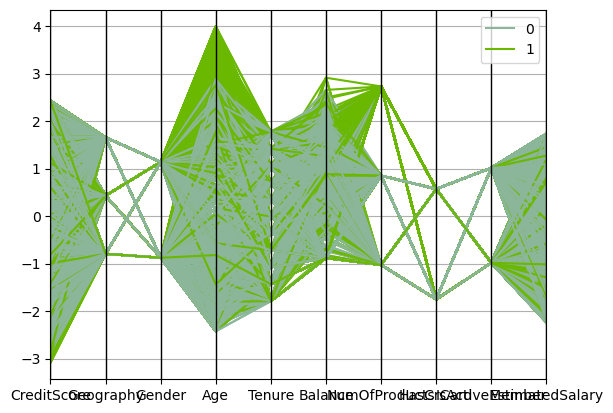

In [31]:
#Overview of the training data using paraplel coordinates
pd.plotting.parallel_coordinates(class_data_scaled,"Exited")

In [33]:
#Separtate the scaled data by classes
class_data_scaled_0 = class_data_scaled.groupby('Exited').get_group(0)
class_data_scaled_1 = class_data_scaled.groupby('Exited').get_group(1)

<Figure size 640x480 with 0 Axes>

<Axes: xlabel='CreditScore', ylabel='Density'>

<Axes: xlabel='CreditScore', ylabel='Density'>

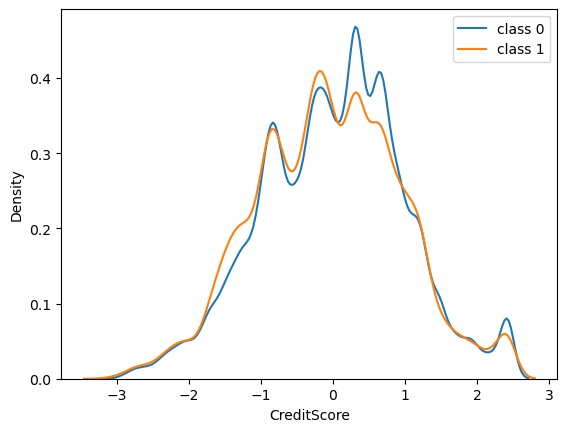

In [34]:
#CreditScore
#create a figure
plt.figure()

#plot the density graph of CreditScore column of each closs
sns.kdeplot(class_data_scaled_0['CreditScore'], label='class 0')
sns.kdeplot(class_data_scaled_1['CreditScore'], label='class 1')


#Show the graph
plt.legend()
plt.show()

<Figure size 640x480 with 0 Axes>

<Axes: xlabel='Age', ylabel='Density'>

<Axes: xlabel='Age', ylabel='Density'>

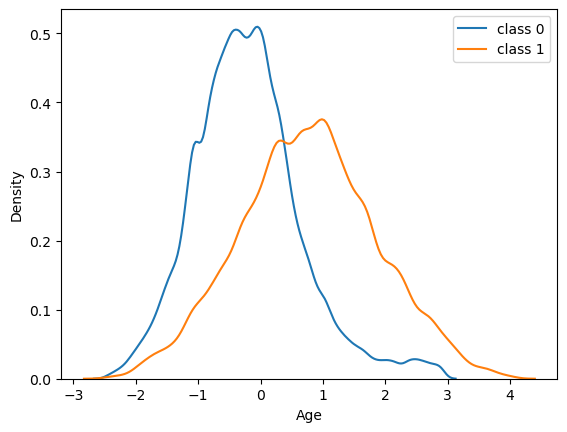

In [35]:
#Age
#create a figure
plt.figure()

#plot the density graph of Age column of each closs
sns.kdeplot(class_data_scaled_0['Age'], label='class 0')
sns.kdeplot(class_data_scaled_1['Age'], label='class 1')


#Show the graph
plt.legend()
plt.show()

<Figure size 640x480 with 0 Axes>

<Axes: xlabel='Tenure', ylabel='Density'>

<Axes: xlabel='Tenure', ylabel='Density'>

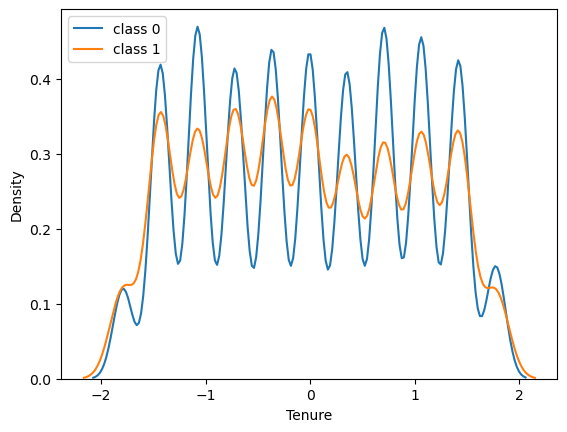

In [36]:
#Tenure
#create a figure
plt.figure()

#plot the density graph of Tenure column of each closs
sns.kdeplot(class_data_scaled_0['Tenure'], label='class 0')
sns.kdeplot(class_data_scaled_1['Tenure'], label='class 1')


#Show the graph
plt.legend()
plt.show()

<Figure size 640x480 with 0 Axes>

<Axes: xlabel='Balance', ylabel='Density'>

<Axes: xlabel='Balance', ylabel='Density'>

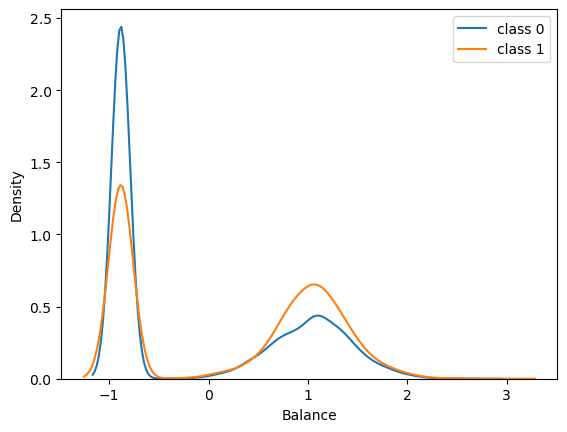

In [37]:
#Balance
#create a figure
plt.figure()

#plot the density graph of Balance column of each closs
sns.kdeplot(class_data_scaled_0['Balance'], label='class 0')
sns.kdeplot(class_data_scaled_1['Balance'], label='class 1')


#Show the graph
plt.legend()
plt.show()

<Figure size 640x480 with 0 Axes>

<Axes: xlabel='NumOfProducts', ylabel='Density'>

<Axes: xlabel='NumOfProducts', ylabel='Density'>

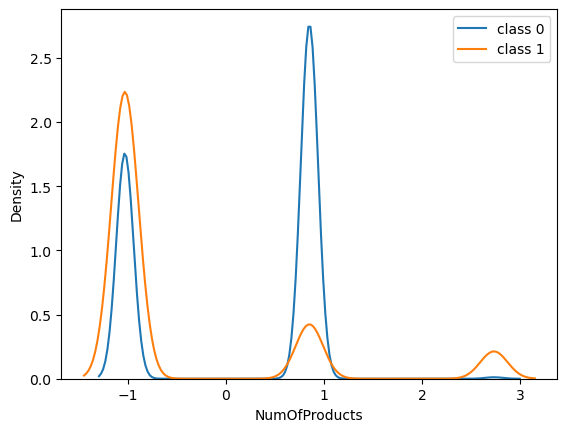

In [38]:
#NumOfProducts
#create a figure
plt.figure()

#plot the density graph of NumOfProducts column of each closs
sns.kdeplot(class_data_scaled_0['NumOfProducts'], label='class 0')
sns.kdeplot(class_data_scaled_1['NumOfProducts'], label='class 1')


#Show the graph
plt.legend()
plt.show()

<Figure size 640x480 with 0 Axes>

<Axes: xlabel='HasCrCard', ylabel='Density'>

<Axes: xlabel='HasCrCard', ylabel='Density'>

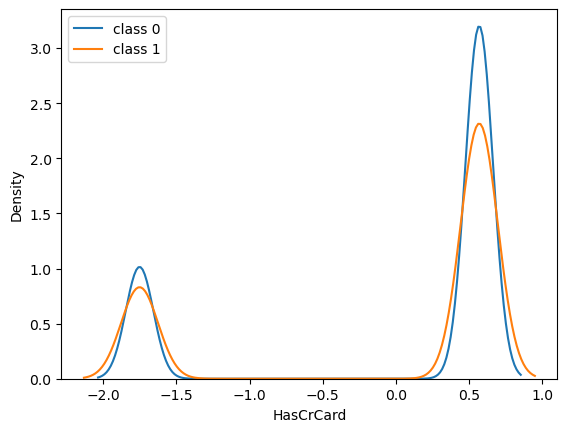

In [39]:
#HasCrCard
#create a figure
plt.figure()

#plot the density graph of HasCrCard column of each closs
sns.kdeplot(class_data_scaled_0['HasCrCard'], label='class 0')
sns.kdeplot(class_data_scaled_1['HasCrCard'], label='class 1')


#Show the graph
plt.legend()
plt.show()

<Figure size 640x480 with 0 Axes>

<Axes: xlabel='IsActiveMember', ylabel='Density'>

<Axes: xlabel='IsActiveMember', ylabel='Density'>

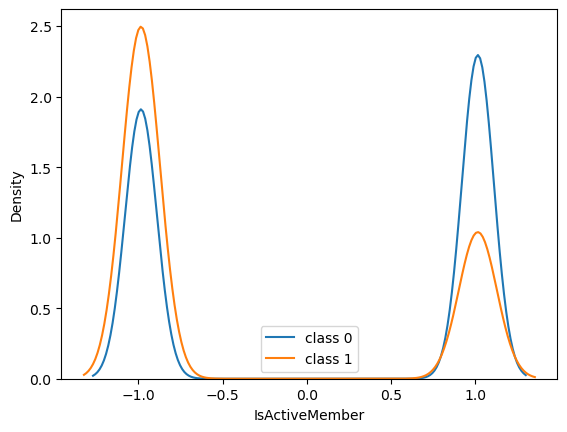

In [40]:
#IsActiveMember
#create a figure
plt.figure()

#plot the density graph of IsActiveMember column of each closs
sns.kdeplot(class_data_scaled_0['IsActiveMember'], label='class 0')
sns.kdeplot(class_data_scaled_1['IsActiveMember'], label='class 1')


#Show the graph
plt.legend()
plt.show()

<Figure size 640x480 with 0 Axes>

<Axes: xlabel='EstimatedSalary', ylabel='Density'>

<Axes: xlabel='EstimatedSalary', ylabel='Density'>

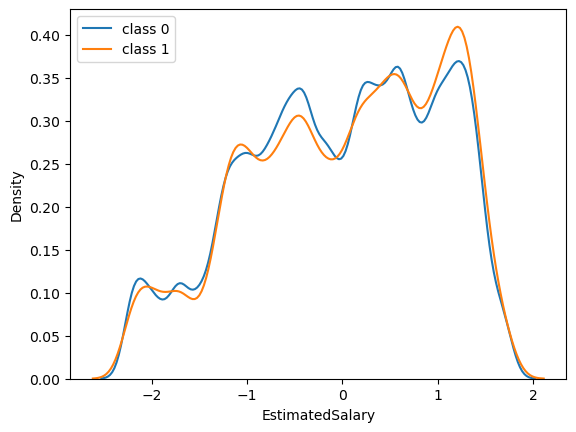

In [41]:
#EstimatedSalary
#create a figure
plt.figure()

#plot the density graph of EstimatedSalary column of each closs
sns.kdeplot(class_data_scaled_0['EstimatedSalary'], label='class 0')
sns.kdeplot(class_data_scaled_1['EstimatedSalary'], label='class 1')


#Show the graph
plt.legend()
plt.show()

<Figure size 640x480 with 0 Axes>

<Axes: xlabel='Geography', ylabel='Density'>

<Axes: xlabel='Geography', ylabel='Density'>

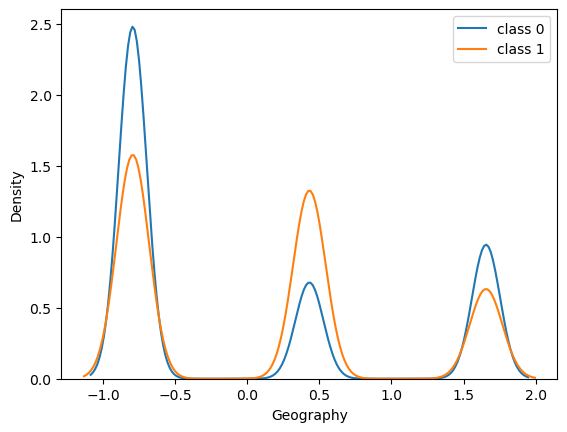

In [42]:
#Geography
#create a figure
plt.figure()

#plot the density graph of Geography column of each closs
sns.kdeplot(class_data_scaled_0['Geography'], label='class 0')
sns.kdeplot(class_data_scaled_1['Geography'], label='class 1')


#Show the graph
plt.legend()
plt.show()

<Figure size 640x480 with 0 Axes>

<Axes: xlabel='Gender', ylabel='Density'>

<Axes: xlabel='Gender', ylabel='Density'>

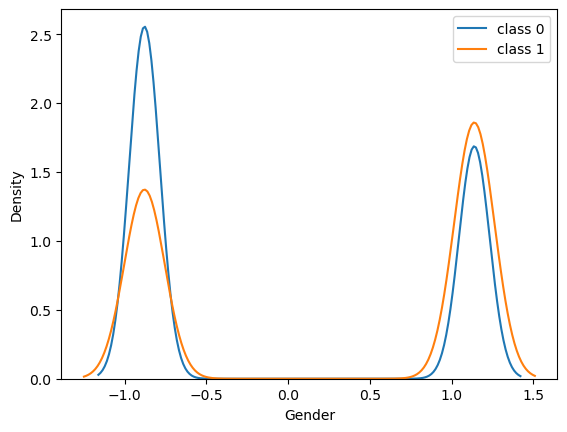

In [43]:
#Gender
#create a figure
plt.figure()

#plot the density graph of Gender column of each closs
sns.kdeplot(class_data_scaled_0['Gender'], label='class 0')
sns.kdeplot(class_data_scaled_1['Gender'], label='class 1')


#Show the graph
plt.legend()
plt.show()

In [44]:
class_data_scaled

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
id,,,,,,,,,,,
0,0.142692,-0.794111,-0.878152,-0.573662,-0.720332,-0.882841,0.851051,0.570670,-0.984666,1.368273,0
1,-0.371842,-0.794111,-0.878152,-0.573662,-1.433281,-0.882841,0.851051,0.570670,1.015567,-1.256721,0
2,0.268188,-0.794111,-0.878152,0.290193,1.774989,-0.882841,0.851051,0.570670,-0.984666,1.436247,0
3,-0.949125,-0.794111,-0.878152,-0.450254,-1.076807,1.487869,-1.027744,0.570670,1.015567,-0.559276,0
4,0.745074,1.655753,-0.878152,-0.573662,-0.007383,-0.882841,0.851051,0.570670,1.015567,-1.941777,0
...,...,...,...,...,...,...,...,...,...,...,...
165029,0.130143,1.655753,1.138748,-0.573662,-1.076807,-0.882841,-1.027744,0.570670,1.015567,0.381209,0
165030,1.698845,-0.794111,-0.878152,-0.326846,-0.720332,-0.882841,-1.027744,-1.752316,-0.984666,0.381203,0
165031,-1.149919,-0.794111,-0.878152,-0.820478,-0.007383,-0.882841,-1.027744,0.570670,1.015567,0.293571,0


In [70]:
#PCA analysis
pca = PCA(n_components=len(class_data_scaled.drop(columns=['Exited']).columns))
pca.fit(class_data_scaled.drop(columns=['Exited'])) 

PCA(n_components=10)

In [71]:
pca.components_

array([[-0.01662948,  0.24968336,  0.12578278,  0.32294844, -0.0316808 ,
         0.63473896, -0.63072337, -0.04847853, -0.11314635,  0.02008019],
       [-0.24701684, -0.23873239,  0.56826056,  0.39779675, -0.04602518,
        -0.24666893,  0.06756334,  0.19072536, -0.53061598,  0.12397196],
       [ 0.15016876,  0.21175201,  0.39301093,  0.22660105, -0.4059898 ,
        -0.11832904,  0.17159021, -0.63959137,  0.25996063, -0.20463498],
       [-0.69122813, -0.15351164, -0.24803214, -0.00548001, -0.38378044,
         0.01529977, -0.08357109,  0.03012341,  0.02360337, -0.53020533],
       [ 0.15214744,  0.22577841,  0.11222669,  0.07335031,  0.56277149,
        -0.04554564,  0.07519478,  0.04411359, -0.17296411, -0.74269587],
       [-0.58269899,  0.13021589, -0.01396325,  0.01131965,  0.54918987,
        -0.02559905,  0.05184325, -0.49542268,  0.06835217,  0.29684069],
       [-0.20939132,  0.83239948,  0.0418659 , -0.1072789 , -0.19739559,
        -0.02607992,  0.26818916,  0.33507335

In [72]:
pca.explained_variance_

array([1.47409507, 1.06671378, 1.02172476, 1.00036425, 0.99841971,
       0.99486372, 0.97447634, 0.95736496, 0.91165977, 0.60031763])

In [73]:
explained_variance_ratio = pca.explained_variance_ratio_
print("Explained variance ratio for each principal component:")
for i, ratio in enumerate(explained_variance_ratio):
    print(f"PC{i+1}: {ratio:.4f}")

Explained variance ratio for each principal component:
PC1: 0.1474
PC2: 0.1067
PC3: 0.1022
PC4: 0.1000
PC5: 0.0998
PC6: 0.0995
PC7: 0.0974
PC8: 0.0957
PC9: 0.0912
PC10: 0.0600


In [74]:
components_df = pd.DataFrame(pca.components_.T, index=class_data_scaled.drop(columns=['Exited']).columns, columns=[f"PC{i+1}" for i in range(len(class_data_scaled.drop(columns=['Exited']).columns))])
print("\nPrincipal component loadings (feature weights):")
print(components_df)


Principal component loadings (feature weights):
                      PC1       PC2       PC3       PC4       PC5       PC6  \
CreditScore     -0.016629 -0.247017  0.150169 -0.691228  0.152147 -0.582699   
Geography        0.249683 -0.238732  0.211752 -0.153512  0.225778  0.130216   
Gender           0.125783  0.568261  0.393011 -0.248032  0.112227 -0.013963   
Age              0.322948  0.397797  0.226601 -0.005480  0.073350  0.011320   
Tenure          -0.031681 -0.046025 -0.405990 -0.383780  0.562771  0.549190   
Balance          0.634739 -0.246669 -0.118329  0.015300 -0.045546 -0.025599   
NumOfProducts   -0.630723  0.067563  0.171590 -0.083571  0.075195  0.051843   
HasCrCard       -0.048479  0.190725 -0.639591  0.030123  0.044114 -0.495423   
IsActiveMember  -0.113146 -0.530616  0.259961  0.023603 -0.172964  0.068352   
EstimatedSalary  0.020080  0.123972 -0.204635 -0.530205 -0.742696  0.296841   

                      PC7       PC8       PC9      PC10  
CreditScore     -0.2093